In [1]:
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm 
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import numpy as np

/Users/vedparanjape/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def concat_bias(dataframee):
    bias = np.ones((len(dataframee),1))
#     dataframee = pd.concat([bias,dataframee], axis=1,ignore_index=True)
    dataframee.insert(0, 'bias', bias)
    return dataframee

In [3]:
df = pd.read_csv('result.csv')

/Users/vedparanjape/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,unique_titd,tire.country_fk,section.section_fk,tiregroup.testplan_fk,mileage,date,tacho,td_min,td_mean,wheelposition,...,finding_1_(BD-06) Broken Bead,finding_1_(TR-13) Open Splice,finding_1_(TR-14) Tread Leaving Belt,finding_1_(TR-10) Worn Too Far,finding_1_(BD-03) Deformed Bead,finding_1_(TR-15) Belt Leaving Belt,finding_1_(IN-03) Circumferential Cracking,finding_1_(IN-02) Diagonal Cracking,finding_1_(IN-05) Damaged (Foreign Object),finding_1_(BD-07) Chafer Edge Separation
0,uh02480xxxxxg3poc3bg00b10_uh02480xxxxx4mrovkfg...,kaykxxxxxxxx2rsgrh2e00n00,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,0.0,7/1/2010,NaN,15.0,15.24000,NaN,...,0,0,0,0,0,0,0,0,0,0
1,uh02480xxxxxg3poc3bg00b10_uh06144xxxxx6o4fnpig...,kaykxxxxxxxx2rsgrh2e00n00,uh02480xxxxxg3poc3bg00a10,NaN,16937.0,1/9/2011,697268.0,13.7,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,uh02480xxxxxg3poc3bg00b10_uh06144xxxxx0uslnrlg...,kaykxxxxxxxx2rsgrh2e00n00,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,NaN,3/27/2011,NaN,12.8,13.20000,NaN,...,0,0,0,0,0,0,0,0,0,0
3,uh02480xxxxxg3poc3bg00b10_uh06144xxxxxzpqltxpg...,NaN,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,78229.0,7/10/2011,NaN,11.3,11.69500,NaN,...,0,0,0,0,0,0,0,0,0,0
4,uh02480xxxxxg3poc3bg00b10_uh06144xxxxx62epzusg...,NaN,uh02480xxxxxg3poc3bg00a10,uh02480xxxxxjnt47iag00000,104422.0,9/21/2011,784753.0,10.3,10.66875,NaN,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = df.drop(['unique_titd', 'tire.country_fk', 'section.section_fk',
       'tiregroup.testplan_fk'],axis=1)
df.head()

,mileage,date,tacho,td_min,td_mean,wheelposition,rimtype,tisize_rim,tisize_width,tisize_radial,...,finding_1_(BD-06) Broken Bead,finding_1_(TR-13) Open Splice,finding_1_(TR-14) Tread Leaving Belt,finding_1_(TR-10) Worn Too Far,finding_1_(BD-03) Deformed Bead,finding_1_(TR-15) Belt Leaving Belt,finding_1_(IN-03) Circumferential Cracking,finding_1_(IN-02) Diagonal Cracking,finding_1_(IN-05) Damaged (Foreign Object),finding_1_(BD-07) Chafer Edge Separation
0,0.0,7/1/2010,NaN,15.0,15.24000,NaN,Steel,22.5,315.0,R,...,0,0,0,0,0,0,0,0,0,0
1,16937.0,1/9/2011,697268.0,13.7,NaN,NaN,Steel,22.5,315.0,R,...,0,0,0,0,0,0,0,0,0,0
2,NaN,3/27/2011,NaN,12.8,13.20000,NaN,Steel,22.5,315.0,R,...,0,0,0,0,0,0,0,0,0,0
3,78229.0,7/10/2011,NaN,11.3,11.69500,NaN,Steel,22.5,315.0,R,...,0,0,0,0,0,0,0,0,0,0
4,104422.0,9/21/2011,784753.0,10.3,10.66875,NaN,NaN,22.5,315.0,R,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['mileage', 'date', 'tacho', 'td_min', 'td_mean', 'wheelposition',
       'rimtype', 'tisize_rim', 'tisize_width', 'tisize_radial',
       'tisize_ratio', 'numspikes_na', 'finding', 'reason', 'wheelposition_1',
       'mileage_1', 'tacho_1', 'td_min_1', 'td_mean_1', 'rimtype_1',
       'tisize_rim_1', 'tisize_width_1', 'tisize_radial_1', 'tisize_ratio_1',
       'numspikes_na_1', 'finding_1', 'td_min_b', 'td_mean_b',
       'finding_1_test finished', 'finding_1_due to IW',
       'finding_1_sidewall finding', 'finding_1_cancelled',
       'finding_1_as a partner',
       'finding_1_Due to mechanical vehicle problems', 'finding_1_tire lost',
       'finding_1_worn', 'finding_1_tread damage',
       'finding_1_innerliner damage',
       'finding_1_worn (from the customers point of view)',
       'finding_1_as set/axle worn', 'finding_1_sidewall damage',
       'finding_1_tread endurance', 'finding_1_bead finding',
       'finding_1_belt finding', 'finding_1_unknown',
       'findin

In [7]:
train_cols = [
       'mileage_1', 'tacho_1', 'td_min_1', 'td_mean_1',
       'tisize_rim_1', 'tisize_width_1', 'tisize_ratio_1',
       'numspikes_na_1', 'td_min_b', 'td_mean_b',
       'finding_1_test finished', 'finding_1_due to IW',
       'finding_1_sidewall finding', 'finding_1_cancelled',
       'finding_1_as a partner',
       'finding_1_Due to mechanical vehicle problems', 'finding_1_tire lost',
       'finding_1_worn', 'finding_1_tread damage',
       'finding_1_innerliner damage',
       'finding_1_worn (from the customers point of view)',
       'finding_1_as set/axle worn', 'finding_1_sidewall damage',
       'finding_1_tread endurance', 'finding_1_bead finding',
       'finding_1_belt finding', 'finding_1_unknown',
       'finding_1_due to vibration', 'finding_1_bead damage',
       'finding_1_reason unknown, tire must be analyzed',
       'finding_1_innerliner finding',
       'finding_1_due to the time of the year (autumn, winter)',
       'finding_1_tire damaged, reason unknown',
       'finding_1_tread finding (chipping and chunking/mini cuts)',
       'finding_1_due to handling', 'finding_1_belt damage',
       'finding_1_incorrect result', 'finding_1_body ply finding',
       'finding_1_Vehicle sold',
       'finding_1_due to the time of the year (spring)',
       'finding_1_Sidewall worn (city bus w/ indicator)',
       'finding_1_(IN-08) Strained carcass cords', 'finding_1_(TR-03) Crack',
       'finding_1_(IN-06) Damaged (Underinflation)',
       'finding_1_(TR-04) Chipping/Chunking',
       'finding_1_(SW-01) Puncture/Cut(To Interior)',
       'finding_1_(TR-09) Irregular Wear', 'finding_1_(TR-11) Worn Out',
       'finding_1_(GN-08) Tire Destroyed',
       'finding_1_(SW-02) Puncture/Cut(Not To Interior)',
       'finding_1_(SW-12) Bulge/Blister',
       'finding_1_(TR-01) Puncture/Cut (To Interior)',
       'finding_1_(SH-07) Belt Edge Separation',
       'finding_1_(BD-04) Burned Bead', 'finding_1_(TR-12) Rib/Lug Tearing',
       'finding_1_(TR-07) Spin Cut Damage', 'finding_1_(TR-06) Impact Break',
       'finding_1_(TR-02) Puncture/Cut (Not To Interior)',
       'finding_1_(SW-03) Impact Break',
       'finding_1_(BD-12) Other (Explain In Comments)',
       'finding_1_(TR-17) Other (Explain in comments)',
       'finding_1_(SH-02) Puncture/Cut(Not To Interior)',
       'finding_1_(GN-10) Other (Explain in comments)',
       'finding_1_(BD-02) Mount/Dismount Damage',
       'finding_1_(SH-08) Other (Explain In Comments)',
       'finding_1_(SW-14) Cut Separation',
       'finding_1_(SW-09) Cord Fatigue/Zipper',
       'finding_1_(IN-09) Separation (From Innerliner)',
       'finding_1_(SH-01) Puncture/Cut(To Interior)',
       'finding_1_(SW-05) Runflat Damage', 'finding_1_(GN-09) Flat Spot',
       'finding_1_(SW-13) Separation', 'finding_1_(BD-06) Broken Bead',
       'finding_1_(TR-13) Open Splice', 'finding_1_(TR-14) Tread Leaving Belt',
       'finding_1_(TR-10) Worn Too Far', 'finding_1_(BD-03) Deformed Bead',
       'finding_1_(TR-15) Belt Leaving Belt',
       'finding_1_(IN-03) Circumferential Cracking',
       'finding_1_(IN-02) Diagonal Cracking',
       'finding_1_(IN-05) Damaged (Foreign Object)',
       'finding_1_(BD-07) Chafer Edge Separation','td_min_b']

#'tisize_radial_1'
#'rimtype_1'
#'wheelposition_1'
data= df[train_cols]
labels = df['td_min_b']

In [8]:
len(data.columns)
# labels.head()

83

In [9]:
# logit = sm.Logit(labels,data)

In [10]:
# result = logit.fit()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0)
# X_train = concat_bias(X_train)

X_train.to_csv('train_data.csv',index=False)
# y_train.to_csv('train_labels.csv',index=False)

In [18]:
y_train.columns = ['target']
y_train.columns

['target']

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [19]:
X_train.head()

,bias,mileage_1,tacho_1,td_min_1,td_mean_1,tisize_rim_1,tisize_width_1,tisize_ratio_1,numspikes_na_1,td_min_b,...,finding_1_(BD-06) Broken Bead,finding_1_(TR-13) Open Splice,finding_1_(TR-14) Tread Leaving Belt,finding_1_(TR-10) Worn Too Far,finding_1_(BD-03) Deformed Bead,finding_1_(TR-15) Belt Leaving Belt,finding_1_(IN-03) Circumferential Cracking,finding_1_(IN-02) Diagonal Cracking,finding_1_(IN-05) Damaged (Foreign Object),finding_1_(BD-07) Chafer Edge Separation
622678,1.0,0.0,228741.0,13.7267,13.868350,22.5,295.00,80,1,0,...,0,0,0,0,0,0,0,0,0,0
92106,1.0,160331.0,547891.0,7.7000,9.030400,22.5,295.00,80,1,0,...,0,0,0,0,0,0,0,0,0,0
7276,1.0,15738.0,107129.0,4.6300,5.430833,16.0,205.00,55,1,0,...,0,0,0,0,0,0,0,0,0,0
675049,1.0,0.0,228741.0,8.5000,104.780000,29.0,722.75,100,1,0,...,0,0,0,0,0,0,0,0,0,0
613216,1.0,5763.0,28191.0,7.2700,7.578000,16.0,205.00,55,1,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
np.exp(logreg.coef_).shape

(1, 83)

In [117]:
np.exp(logreg.coef_)

array([[0.99987305, 1.00000709, 0.99999954, 0.99350557, 0.99622581,
        0.99855059, 0.98886608, 0.99284303, 0.99994482, 1.00075204,
        1.00007383, 0.99980117, 1.0000259 , 0.99999578, 1.00002894,
        0.99998094, 1.00000324, 0.99999541, 1.00009578, 0.99999177,
        0.99999927, 0.9999939 , 0.99999187, 0.99999351, 0.99999176,
        0.99999841, 1.00000003, 0.99999873, 0.9999995 , 0.99999978,
        0.99999969, 0.99999673, 1.00000158, 0.9999995 , 0.9999968 ,
        0.99999884, 0.99999972, 1.00000053, 0.99999991, 0.99999657,
        0.99999703, 0.99999941, 0.99999998, 1.        , 1.        ,
        1.        , 1.00000003, 0.99999997, 1.00000154, 0.99999999,
        1.        , 1.        , 0.9999998 , 1.        , 1.        ,
        0.99999997, 1.        , 1.        , 0.99999996, 0.99999998,
        0.99999997, 0.99999988, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [70]:
y_pred = logreg.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9665667449836615

In [77]:
from sklearn.metrics import average_precision_score
# from sklearn.metrics import average_recall_score
average_precision = average_precision_score(y_test, y_pred)
# average_recall = average_recall_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))



Average precision-recall score: 0.03


Text(0.5,1,'2-class Precision-Recall curve: AP=0.08')

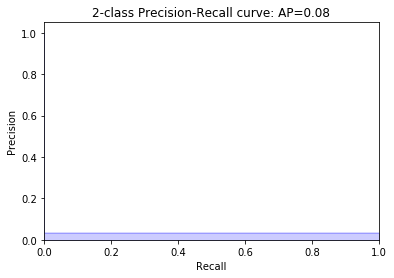

In [75]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[214744,     63],
       [  7365,      2]])

In [84]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=[0,1],
                      title='Confusion matrix, without normalization')


TypeError: only integer scalar arrays can be converted to a scalar index

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                         random_state=0)



In [87]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [88]:
y_pred_rf = clf.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)

0.9724630244763114

Text(0.5,1,'2-class Precision-Recall curve: AP=0.03')

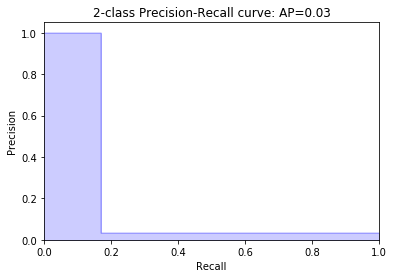

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[214807,      0],
       [  6118,   1249]])

In [92]:
from sklearn.metrics import average_precision_score
# from sklearn.metrics import average_recall_score
average_precision = average_precision_score(y_test, y_pred_rf)
# average_recall = average_recall_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))



Average precision-recall score: 0.20
